In [1]:
import os
import sys

import numpy as np

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from typing import Callable
from numpy.typing import ArrayLike

%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
import matplotlib.pyplot as plt

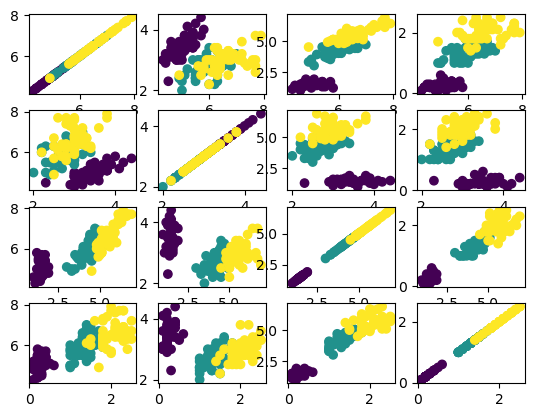

In [7]:
num_features = iris['data'].shape[1]
fig, axs = plt.subplots(num_features, num_features)

# for every feature in the dataset
for i in range(num_features):
    # for every feature in the dataset
    for j in range(num_features):
        # plot out a scatter comparing the results using plt.scatter()
        axs[i][j].scatter(iris['data'][:,i], iris['data'][:,j], c = iris['target'])

# Train/Test Split

Let's create a train/test split first by putting 20% of the dataset in the test split, and the rest are training.

If we look at the data, it is split into all 0s, then all 1s, then all 2s. So we need to get the indices accordingly.

In [8]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
len(iris['target']), sum(iris['target'] == 0), sum(iris['target'] == 1), sum(iris['target'] == 2)

(150, 50, 50, 50)

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(iris['data'], iris['target'], test_size=0.2)

Have a look at the contents of train_data, test_data, train_labels, and test_labels. These will be the $X$s and $Y$s to train and evaluate our model.

In [11]:
# Look at the train_data, test_data, train_labels, test_labels



# Training our First  Model

In this section we'll use sci-kit learn to train our first model and evaluate its performance.

Let's start with the perceptron, you can find info on the perceptron [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron).

In [12]:
#Defining a perceptron with the default parameters
p_model = Perceptron()

In [13]:
# Training the perceptron using the fit method
p_model.fit(train_data, train_labels)

Perceptron()

In [14]:
#Scoring the perceptron using the score method. This returns the accuracy on the training set.
p_model.score(train_data, train_labels)

0.39166666666666666

The above cell gives us the accuracy as a value between 0 and 1 on the training set, but this doesn't represent good perfomance as we have seen this data before. To show how well we generalise, we will now score the model on the test set.

In [15]:
#Score the perceptron on the test set using the .score method and the test_data/test_labels.
p_model.score(test_data, test_labels)

0.43333333333333335

# Training our Second Model

We'll now look at our second model, the Support Vector Machine. You can find information about the SVM [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

In the same way, we'll train the SVM and then evaluate it on the test set and compare its performance with the perceptron that we used above.

In [16]:
# using SVC, create an instance of the SVM
svm = SVC()

In [17]:
# use fit to train the model on the training data

In [18]:
# use score to test the model on the training data

In [19]:
# use score to test the model on the test data

# Training our Third Model

We'll now look at our final model. This will be a Multi Layer Perceptron which extends the Perceptron with multiple layers. This is a deep learning classifier (a more powerful type of model that generally requires a lot of data). You can find more information [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron).

In [20]:
# Create an MLP model

In [21]:
# using the fit method, train the model on the train data

In [22]:
# using the score method, evaluate the model on the train data

In [23]:
# using the score method, evaluate the model on the test data

# Comparing our Models

You may have noticed if you re-generate your dataset that the results change, or that you are getting very different results to your peers. This is because we may be generating an easier/harder test set. We can get around this by doing multiple runs and then averaging our performance. We will use this to check our actual performance for each of the three models.

In [31]:
def run_baseline_tests(model_func: Callable, data: ArrayLike, labels: ArrayLike, num_iter: int=1000):
    """ Runs a number of baseline tests with each test creating a random train/test split of 0.2

    Parameters:
    model_func (function): function which is used to create a ML model
    data (array-like): array of all data elements
    labels (array-like): array of labels for the data
    num_iter (int): number of iterations to run

    Returns:
    float: average score of all runs

    """
    scores = []
    for i in range(num_iter):
        train_data, test_data, train_labels, test_labels = train_test_split(iris['data'], iris['target'], test_size=0.2)
        model = model_func()
        model.fit(train_data, train_labels)
        scores.append(model.score(test_data, test_labels))
    return np.mean(scores)

def get_perceptron():
    return Perceptron()
    
def get_svm():
    #Add code for returning an SVM model
    return None
    
def get_mlp():
    #Add code for returning an SVM model
    return None

In [25]:
iris_data = (iris['data'] - iris['data'].mean(axis=0)) / iris['data'].std(axis=0)

In [26]:
run_baseline_tests(get_perceptron, iris['data'], iris['target'])

0.7344333333333334

In [28]:
run_baseline_tests(get_svm, iris['data'], iris['target'])

0.9610333333333334

In [32]:
run_baseline_tests(get_mlp, iris['data'], iris['target'])

0.9722666666666667

## Improving our Results

From looking at the webpages for each of the model types, these have lots of parameters that we could choose from, different from their default values.
These are known as hyperparameters and can change the performance of the model by a large amount.

Try playing with these parameters for the model and see if you can beat the high scores! Each of the doc pages have some ideas in the example codes, or ask about any potential combinations!